# PROJECT-5 User Analytics in the Telecommunication Industry


**PROBLEM STATEMENT** User Analytics in the Telecommunication Industry - Overview Analyse opportunities for growth and make a recommendation on whether TellCo is worth buying or selling. By analysing a telecommunication dataset that contains useful information about the customers & their activities on the network. #The global objective is divided into 4 sub-objectives.

# IMPORT THE LIBRARY

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# 1. DATA COLLECTION

In [7]:
df = pd.read_excel(r"D:\ALL PROJECT SEND NEXTHIKES\PROJECT 5\telcom_data (2).xlsx")

In [8]:
df

Bearer Id               Start  Start ms  \
0       13114483460844900352 2019-04-04 12:01:18     770.0   
1       13114483482878900224 2019-04-09 13:04:04     235.0   
2       13114483484080500736 2019-04-09 17:42:11       1.0   
3       13114483485442799616 2019-04-10 00:31:25     486.0   
4       13114483499480700928 2019-04-12 20:10:23     565.0   
...                      ...                 ...       ...   
149996   7277825670196679680 2019-04-29 07:28:42     451.0   
149997   7349883264234609664 2019-04-29 07:28:42     483.0   
149998  13114483573367300096 2019-04-29 07:28:43     283.0   
149999  13114483573367300096 2019-04-29 07:28:43     696.0   
150000                                       NaT       NaN   

                       End  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0      2019-04-25 14:35:31   662.0  1823652.0  2.082014e+14   3.366496e+10   
1      2019-04-25 08:15:48   606.0  1365104.0  2.082019e+14   3.368185e+10   
2      2019-04-25 11:58:13   652.0  1361762.0  2.082003e+14   3.376063e+10   
3      2019-04-25 07:36:35   171.0  1321509.0  2.082014e+14   3.375034e+10   
4      2019-04-25 10:40:32   954.0  1089009.0  2.082014e+14   3.369980e+10   
...                    ...     ...        ...           ...            ...   
149996 2019-04-30 06:02:33   214.0    81230.0  2.082022e+14   3.365069e+10   
149997 2019-04-30 10:41:33   187.0    97970.0  2.082019e+14   3.366345e+10   
149998 2019-04-30 10:46:12   810.0    98249.0  2.082017e+14   3.362189e+10   
149999 2019-04-30 10:40:34   327.0    97910.0  2.082021e+14   3.361962e+10   
150000                 NaT     NaN        NaN           NaN            NaN   

                IMEI Last Location Name  ...  Youtube DL (Bytes)  \
0       3.552121e+13   9164566995485190  ...        1.585461e+07   
1       3.579401e+13            L77566A  ...        2.024740e+07   
2       3.528151e+13            D42335A  ...        1.972566e+07   
3       3.535661e+13            T21824A  ...        2.138812e+07   
4       3.540701e+13            D88865A  ...        1.525938e+07   
...              ...                ...  ...                 ...   
149996  3.548311e+13            D20434A  ...        1.619167e+07   
149997  3.566051e+13            D10223C  ...        1.387723e+07   
149998  3.572121e+13            T51102A  ...        2.266051e+07   
149999  8.618620e+13            L88342B  ...        8.817106e+06   
150000           NaN                NaN  ...        1.163407e+07   

        Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0             2.501332e+06        8.198936e+06        9.656251e+06   
1             1.911173e+07        1.833841e+07        1.722713e+07   
2             1.469958e+07        1.758779e+07        6.163408e+06   
3             1.514664e+07        1.399465e+07        1.097942e+06   
4             1.896287e+07        1.712458e+07        4.152180e+05   
...                    ...                 ...                 ...   
149996        1.176343e+07        1.788370e+07        1.967816e+07   
149997        8.288284e+06        1.935015e+07        2.129315e+07   
149998        1.855903e+06        9.963942e+06        5.065760e+06   
149999        8.305402e+06        3.322253e+06        1.317259e+07   
150000        1.100941e+07        1.162685e+07        1.100175e+07   

        Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0            2.780823e+08       1.434415e+07      1.717444e+08   
1            6.087501e+08       1.170709e+06      5.269042e+08   
2            2.295846e+08       3.956300e+05      4.106926e+08   
3            7.995382e+08       1.084972e+07      7.490399e+08   
4            5.277072e+08       3.529801e+06      5.507095e+08   
...                   ...                ...               ...   
149996       5.266097e+08       9.197207e+06      3.264510e+06   
149997       6.268931e+08       4.735033e+06      7.121804e+08   
149998       5.535395e+08       1.339432e+07      1.211009e+08   
149999       3.5253

In [9]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# GETTING FULL INFORMATION OF THE DATA.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

# FINDING NULL VALUE OF ALL THE COLOUMN.

In [13]:
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# TOTAL NULL VALUE IN THE DATA

In [15]:
data=df.isnull().sum()
null_values=data.sum().sum()
print("Number of null values:",null_values)

Number of null values: 1030401


# Use the shape parameter to get the shape of the dataset

In [17]:
rows, cols = df.shape
shape_info = pd.DataFrame({'Property': ['Number of Rows', 'Number of Columns'], 'Value': [rows, cols]})
styled_shape_info = shape_info.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'pink'), ('color', 'red'), ('font-weight', 'bold')]},
        {'selector': 'tbody td', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', 'lime')]},  
        {'selector': 'table', 'props': [('border', '1px solid black')]}
    ]
).set_properties(**{'text-align': 'center'})  
styled_shape_info

In [18]:
df.describe()

Start       Start ms  \
count                         150000  150000.000000   
mean   2019-04-26 12:36:38.953740032     499.188200   
min              2019-04-04 12:01:18       0.000000   
25%    2019-04-25 00:26:00.750000128     250.000000   
50%       2019-04-26 08:51:24.500000     499.000000   
75%    2019-04-27 18:18:59.750000128     749.000000   
max              2019-04-29 07:28:43     999.000000   
std                              NaN     288.611834   

                                 End         End ms     Dur. (ms)  \
count                         150000  150000.000000  1.500000e+05   
mean   2019-04-27 17:40:08.059673344     498.800880  1.046086e+05   
min              2019-04-24 22:59:58       0.000000  7.142000e+03   
25%       2019-04-26 07:30:11.500000     251.000000  5.744050e+04   
50%              2019-04-27 23:02:05     500.000000  8.639900e+04   
75%       2019-04-29 07:15:07.500000     750.000000  1.324302e+05   
max              2019-04-30 23:59:27     999.000000  1.859336e+06   
std                              NaN     288.097653  8.103762e+04   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.494310e+05   1.489350e+05  1.494290e+05    122172.000000   
mean   2.082016e+14   4.188282e+10  4.847455e+13       109.795706   
min    2.040471e+14   3.360100e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365130e+10  3.546071e+13        32.000000   
50%    2.082015e+14   3.366371e+10  3.572201e+13        45.000000   
75%    2.082018e+14   3.368349e+10  8.611970e+13        70.000000   
max    2.140743e+14   8.823971e+14  9.900120e+13     96923.000000   
std    2.148809e+10   2.447443e+12  2.241637e+13       619.782739   

       Avg RTT UL (ms)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count    122189.000000  ...        1.500010e+05        1.500010e+05   
mean         17.662883  ...        1.163407e+07        1.100941e+07   
min           0.000000  ...        5.300000e+01        1.050000e+02   
25%           2.000000  ...        5.833501e+06        5.517965e+06   
50%           5.000000  ...        1.161602e+07        1.101345e+07   
75%          15.000000  ...        1.744852e+07        1.651556e+07   
max        7120.000000  ...        2.325910e+07        2.201196e+07   
std          84.793524  ...        6.710569e+06        6.345423e+06   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count        1.500010e+05        1.500010e+05       1.500010e+05   
mean         1.162685e+07        1.100175e+07       4.220447e+08   
min          4.200000e+01        3.500000e+01       2.516000e+03   
25%          5.777156e+06        5.475981e+06       2.104733e+08   
50%          1.164222e+07        1.099638e+07       4.234081e+08   
75%          1.747048e+07        1.650727e+07       6.331742e+08   
max          2.325919e+07        2.201196e+07       8.434419e+08   
std          6.725218e+06        6.359490e+06       2.439675e+08   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count       1.500010e+05      1.500010e+05      1.500010e+05   
mean        8.288398e+06      4.211005e+08      8.264799e+06   
min         5.900000e+01      3.290000e+03      1.480000e+02   
25%         4.128476e+06      2.101869e+08      4.145943e+06   
50%         8.291208e+06      4.218030e+08      8.267071e+06   
75%         1.243162e+07      6.316918e+08      1.238415e+07   
max         1.655879e+07      8.434425e+08      1.655882e+07   
std         4.782700e+06      2.432050e+08      4.769004e+06   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.500000e+05      1.500000e+05  
mean       4.112121e+07      4.546434e+08  
min        2.866892e+06      7.114041e+06  
25%        3.322201e+07      2.431068e+08  
50%        4.114331e+07      4.558411e+08  
75%        4.903424e+07      6.657055e+08  
max        7.833131e+07      9.029696e+08  
std        1.127639e+07      2.441429e+08  

[8 rows x 51 columns]

In [19]:
df.dtypes[df.dtypes=="object"]

Bearer Id               object
Last Location Name      object
Handset Manufacturer    object
Handset Type            object
dtype: object

In [20]:
df.dtypes[df.dtypes!="object"]

Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float64
50 Kbps < DL TP < 250 Kbps (%)                     float64
250 Kbps < DL TP < 1 Mbps (%)                      float

In [21]:
#finding the missing value in percentage of each column.
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.shape[0] * 100).round(2).sort_values(ascending=False)
summary = pd.concat([total,percent],axis=1 , keys = ["total null values","percentage of null value"])
summary.style.background_gradient(subset = ["percentage of null value"],cmap = "coolwarm")

In [117]:
#  Filling numerical missing values with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)

In [118]:
# Filling categorical missing_values with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna('Unknown'))

In [355]:
df['Start'] =df['Start'].fillna('2025-04-15 05:08:38')

In [357]:
df['End'] = df['End'].fillna('2025-04-19 08:10:32')

# DATA CLEAN

# REMOVE ALL THE NULL VALUES IN THE DATA

In [127]:
df.isnull().sum().iloc[0:55]

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [129]:
df.duplicated().sum()

0

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150001 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150001 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location N

In [131]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)]

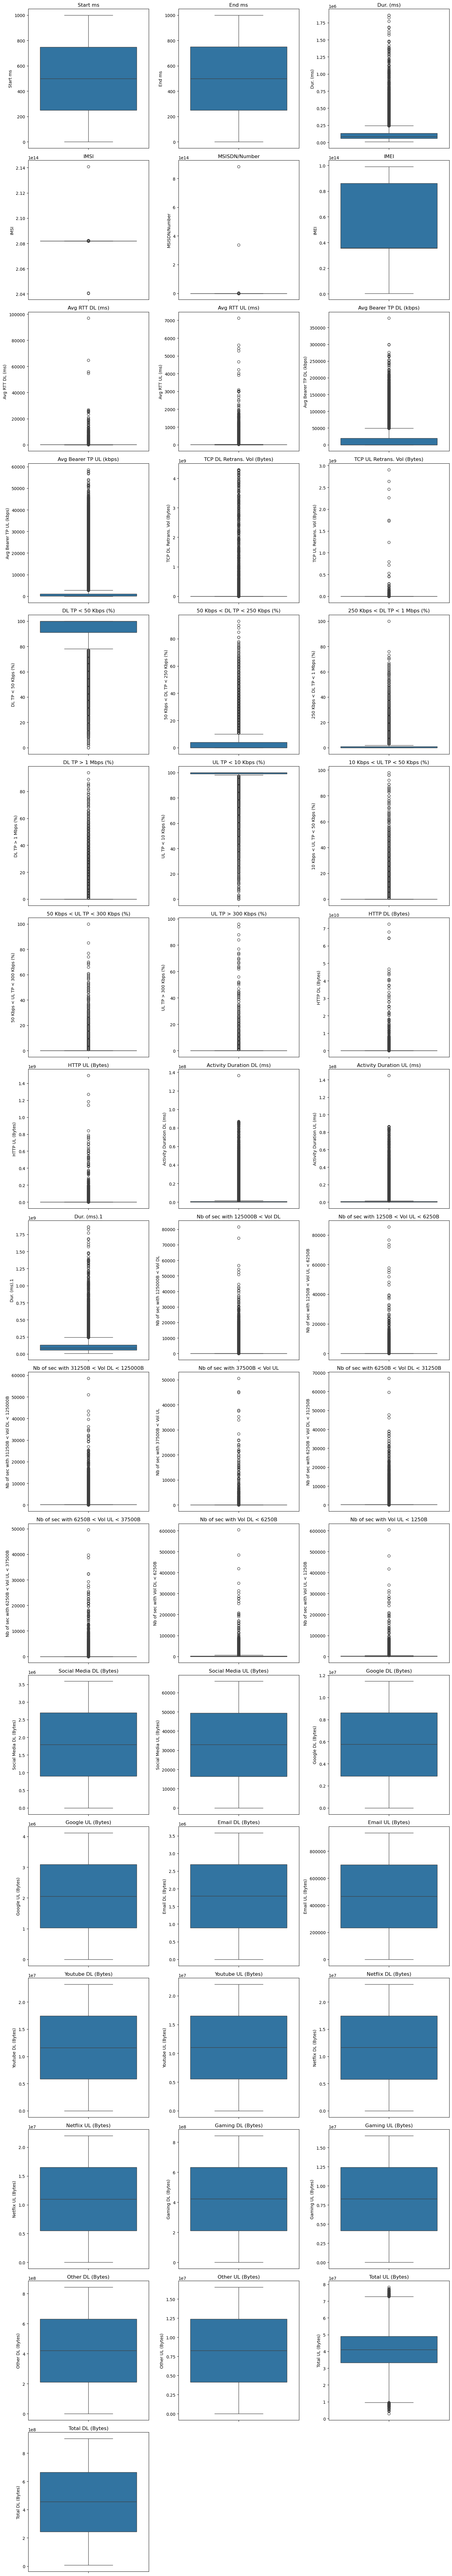

In [132]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = len(numerical_cols)
               
# Calculate the number of rows and columns for the subplots

ncols = 3
nrows = int(np.ceil(num_cols / ncols))  
# Ceiling division to handle any extra columns

plt.figure(figsize=(15, 5 * nrows))  
# Adjust figure height based on number of rows

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=df[col])
    
    plt.title(col)
plt.tight_layout()
plt.show()

# Task 1 - User Overview Analysis

# Step-1 Identifying the top 10 handsets used by the customers:

In [136]:
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_10_handsets)

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


# Visualizing the Results:

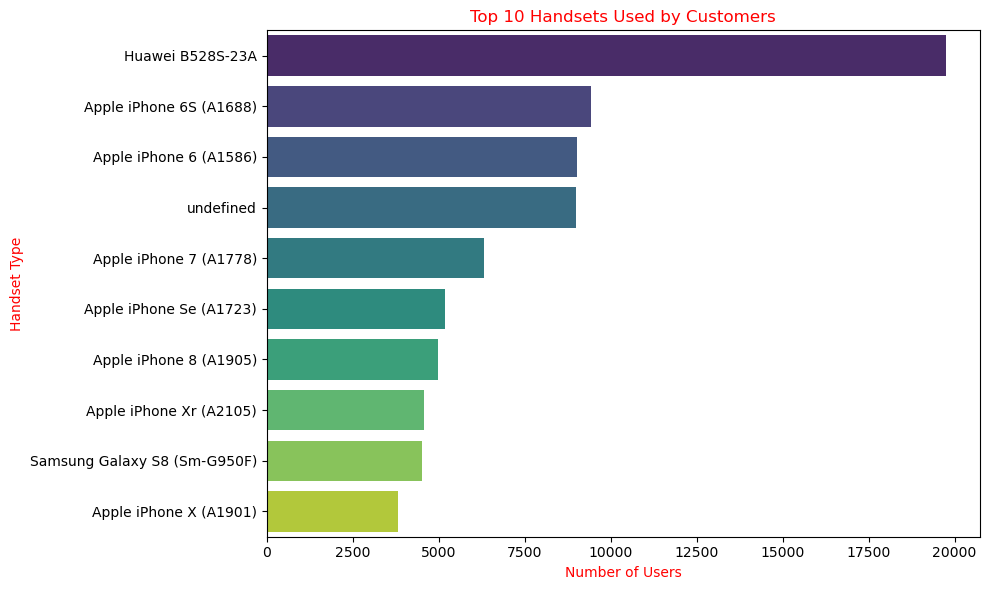

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='viridis')
plt.title('Top 10 Handsets Used by Customers', color='red')
plt.xlabel('Number of Users', color='red')
plt.ylabel('Handset Type', color='red')
plt.tight_layout()
plt.show()

# Step-2 Identify the top 3 handset manufacturers:

In [141]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


# Visualizing the Results:

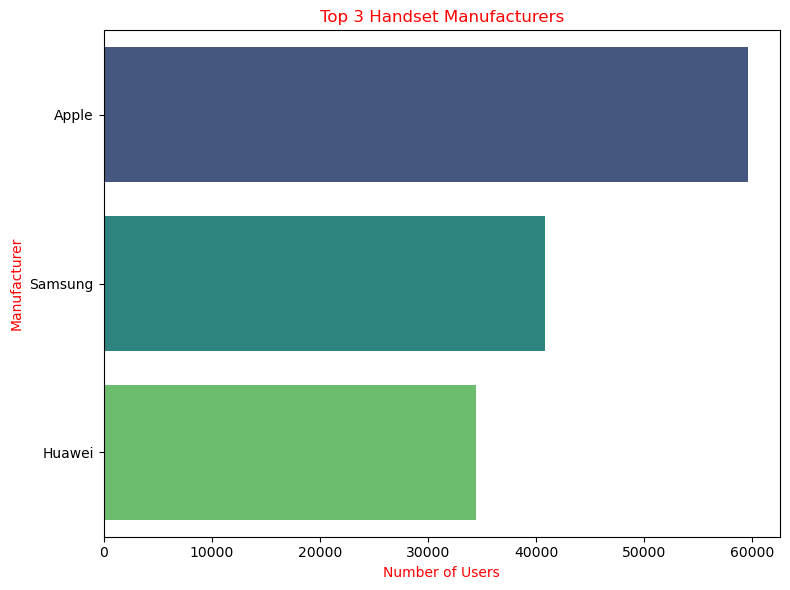

In [144]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette='viridis')
plt.title('Top 3 Handset Manufacturers', color='red')
plt.xlabel('Number of Users', color='red')
plt.ylabel('Manufacturer', color='red')
plt.tight_layout()
plt.show()

# Detailed Interpretation:

**TOP 3 HANDSETS MANUFACTURERS**
◆ Apple: 59,565 users
◆ Samsung: 40,839 users
◆ Huawei: 34,423 users


# Step-3 Identify the top 5 handsets per top 3 handset manufacturer:

In [148]:
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets
    print("Top 5 Handsets per Top 3 Manufacturers:")

Top 5 Handsets per Top 3 Manufacturers:
Top 5 Handsets per Top 3 Manufacturers:
Top 5 Handsets per Top 3 Manufacturers:


In [149]:
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nManufacturer: {manufacturer}")
    print(handsets)


Manufacturer: Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Manufacturer: Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Manufacturer: Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


# Visualizing the Results:

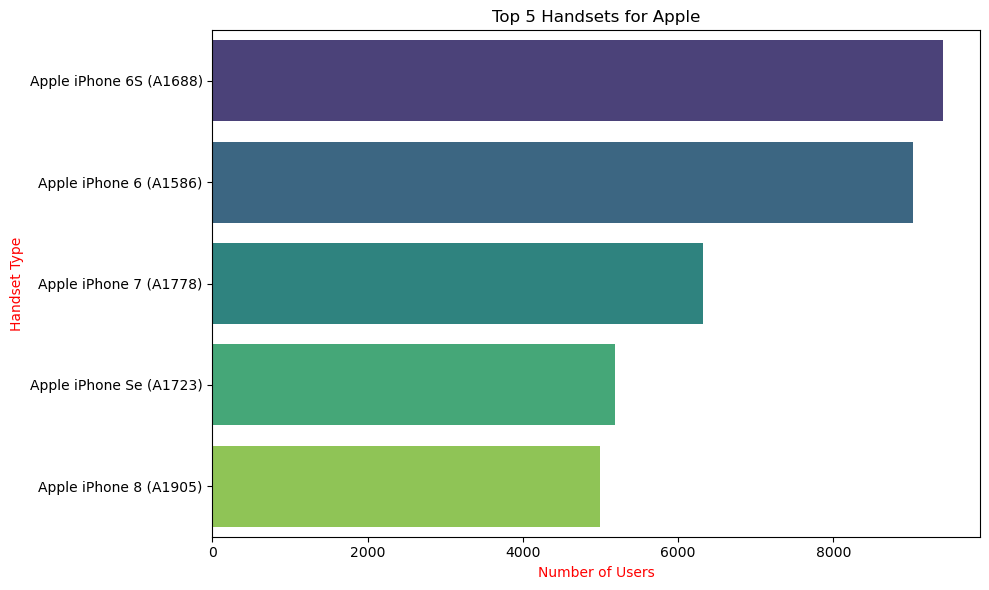

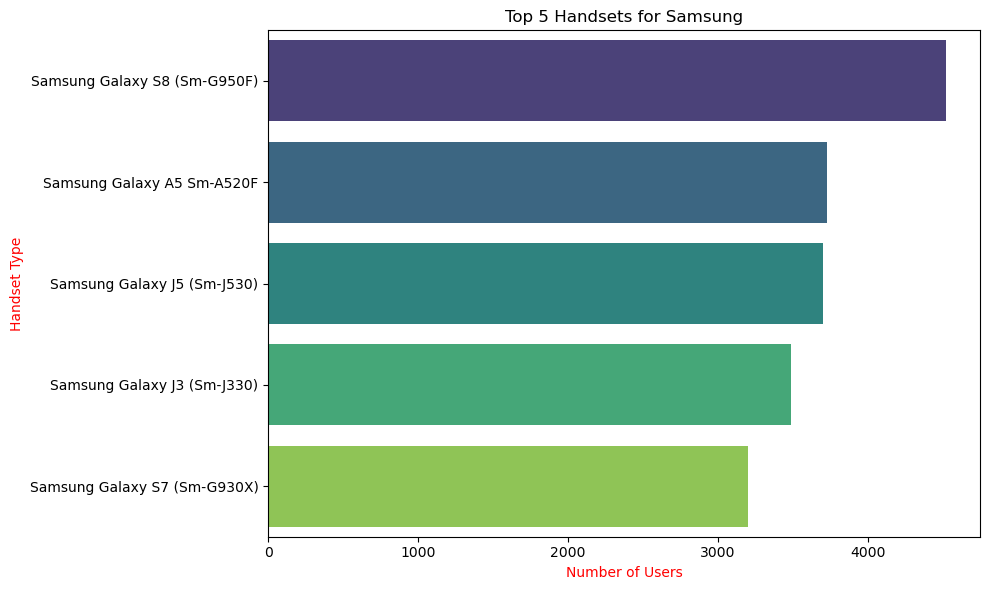

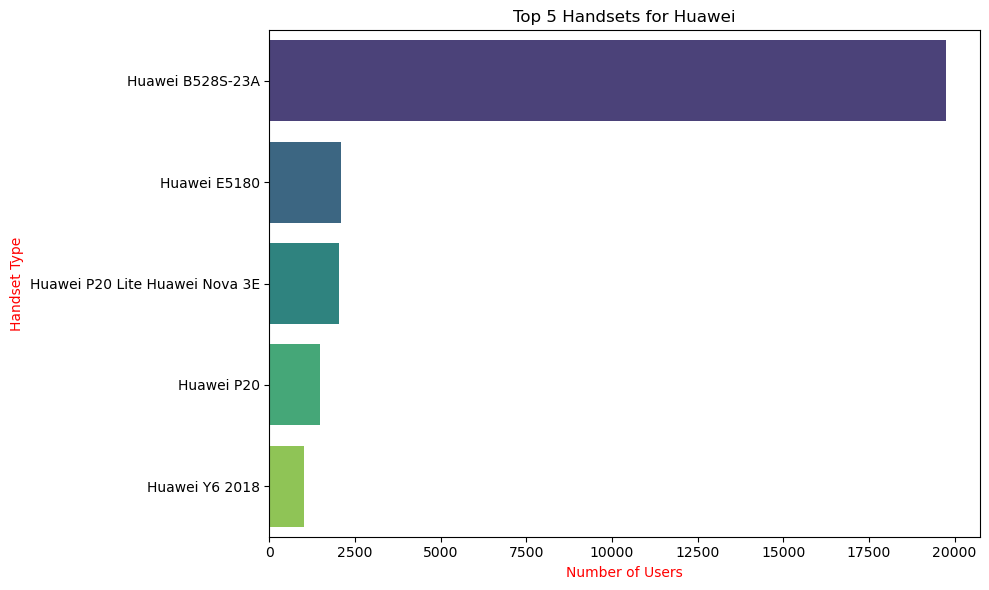

In [151]:
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=handsets.values, y=handsets.index, palette='viridis')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Number of Users', color='red')
    plt.ylabel('Handset Type', color='red')
    plt.tight_layout()
    plt.show()

In [152]:
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 
    'Email DL (Bytes)', 'Email UL (Bytes)', 
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
    'Other DL (Bytes)', 'Other UL (Bytes)'
]
# Summarize data usage for each application
total_usage = df[application_columns].sum()
print(total_usage)

Social Media DL (Bytes)    2.693001e+11
Social Media UL (Bytes)    4.939298e+09
Google DL (Bytes)          8.626186e+11
Google UL (Bytes)          3.084833e+11
Email DL (Bytes)           2.687611e+11
Email UL (Bytes)           7.010648e+10
Youtube DL (Bytes)         1.745123e+12
Youtube UL (Bytes)         1.651423e+12
Netflix DL (Bytes)         1.744039e+12
Netflix UL (Bytes)         1.650274e+12
Gaming DL (Bytes)          6.330713e+13
Gaming UL (Bytes)          1.243268e+12
Other DL (Bytes)           6.316550e+13
Other UL (Bytes)           1.239728e+12
dtype: float64


In [153]:
summary_df = df[application_columns].sum().reset_index()
summary_df.columns = ['Application', 'Total Bytes']
summary_df['Total MB'] = summary_df['Total Bytes'] / (1024 ** 2)  # Convert to MB
summary_df = summary_df.sort_values(by='Total MB', ascending=False)
print(summary_df)

                Application   Total Bytes      Total MB
10        Gaming DL (Bytes)  6.330713e+13  6.037438e+07
12         Other DL (Bytes)  6.316550e+13  6.023932e+07
6        Youtube DL (Bytes)  1.745123e+12  1.664279e+06
8        Netflix DL (Bytes)  1.744039e+12  1.663246e+06
7        Youtube UL (Bytes)  1.651423e+12  1.574919e+06
9        Netflix UL (Bytes)  1.650274e+12  1.573824e+06
11        Gaming UL (Bytes)  1.243268e+12  1.185673e+06
13         Other UL (Bytes)  1.239728e+12  1.182297e+06
2         Google DL (Bytes)  8.626186e+11  8.226572e+05
3         Google UL (Bytes)  3.084833e+11  2.941926e+05
0   Social Media DL (Bytes)  2.693001e+11  2.568246e+05
4          Email DL (Bytes)  2.687611e+11  2.563106e+05
5          Email UL (Bytes)  7.010648e+10  6.685875e+04
1   Social Media UL (Bytes)  4.939298e+09  4.710482e+03


# Visualization Data:

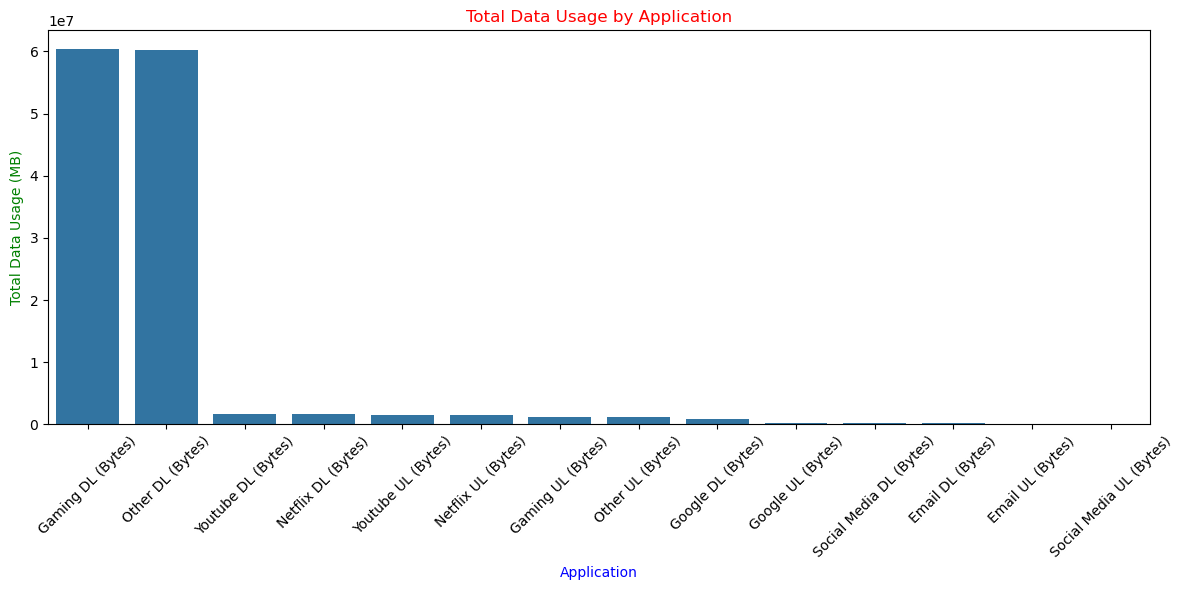

In [155]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Application', y='Total MB', data=summary_df)
plt.title('Total Data Usage by Application', color='red')
plt.xlabel('Application', color='blue')
plt.ylabel('Total Data Usage (MB)', color='green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Social media usage of (DL+UL)Conducting User Behavior Analysis through xDR Data**

In [157]:
social_media_usage = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)']].sum()
print(social_media_usage)

Social Media DL (Bytes)    2.693001e+11
Social Media UL (Bytes)    4.939298e+09
dtype: float64


# Create a column for total data volume per application (DL + UL)

In [159]:
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    df[f'{app} Total (Bytes)'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']

**Aggregate per user**

In [161]:
user_behavior = df.groupby('MSISDN/Number').agg({
    
    'Dur. (ms)': 'sum',    # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    **{col: 'sum' for col in application_columns},  # Total data volume for each application
    **{f'{app} Total (Bytes)': 'sum' for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']}
}).reset_index()

In [162]:
user_behavior.rename(columns={
    'Bearer_Id': 'Number of xDR Sessions'
}, inplace=True)

print(user_behavior.head())

   MSISDN/Number  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0   3.360100e+10   116720.0      8.426375e+08        36053108.0   
1   3.360100e+10   181230.0      1.207552e+08        36104459.0   
2   3.360100e+10   134969.0      5.566597e+08        39306820.0   
3   3.360101e+10    49878.0      4.019932e+08        20327526.0   
4   3.360101e+10    37104.0      1.363130e+09        94280527.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2206504.0                  25631.0          3337123.0   
1                2598548.0                  62017.0          4197697.0   
2                3148004.0                  47619.0          3343483.0   
3                 251469.0                  28825.0          5937765.0   
4                2861230.0                  51312.0         13728668.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  ...  \
0          1051882.0          837400.0          493962.0  ...   
1          1137166.0  

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 62 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150001 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150001 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location N

# Non-Graphical Univariate Analysis:

In [165]:
dispersion_parameters = df.select_dtypes(include=['float64', 'int64']).agg(['mean', 'std', 'var', 'min', 'max'])
print(dispersion_parameters)

          Start ms        End ms     Dur. (ms)          IMSI  MSISDN/Number  \
mean    499.188199    498.800888  1.046084e+05  2.082016e+14   4.182441e+10   
std     288.610872    288.096693  8.103736e+04  2.144723e+10   2.438731e+12   
var   83296.235554  82999.704454  6.567055e+09  4.599835e+20   5.947411e+24   
min       0.000000      0.000000  7.142000e+03  2.040471e+14   3.360100e+10   
max     999.000000    999.000000  1.859336e+06  2.140743e+14   8.823971e+14   

              IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
mean  4.842592e+13        97.774455        15.315031             1.329996e+04   
std   2.238739e+13       559.909444        76.687998             2.397182e+04   
var   5.011953e+26    313498.585409      5881.048988             5.746483e+08   
min   4.400152e+11         0.000000         0.000000             0.000000e+00   
max   9.900120e+13     96923.000000      7120.000000             3.781600e+05   

      Avg Bearer TP UL (kbps)  ...  Ot

# Graphical Univariate Analysis

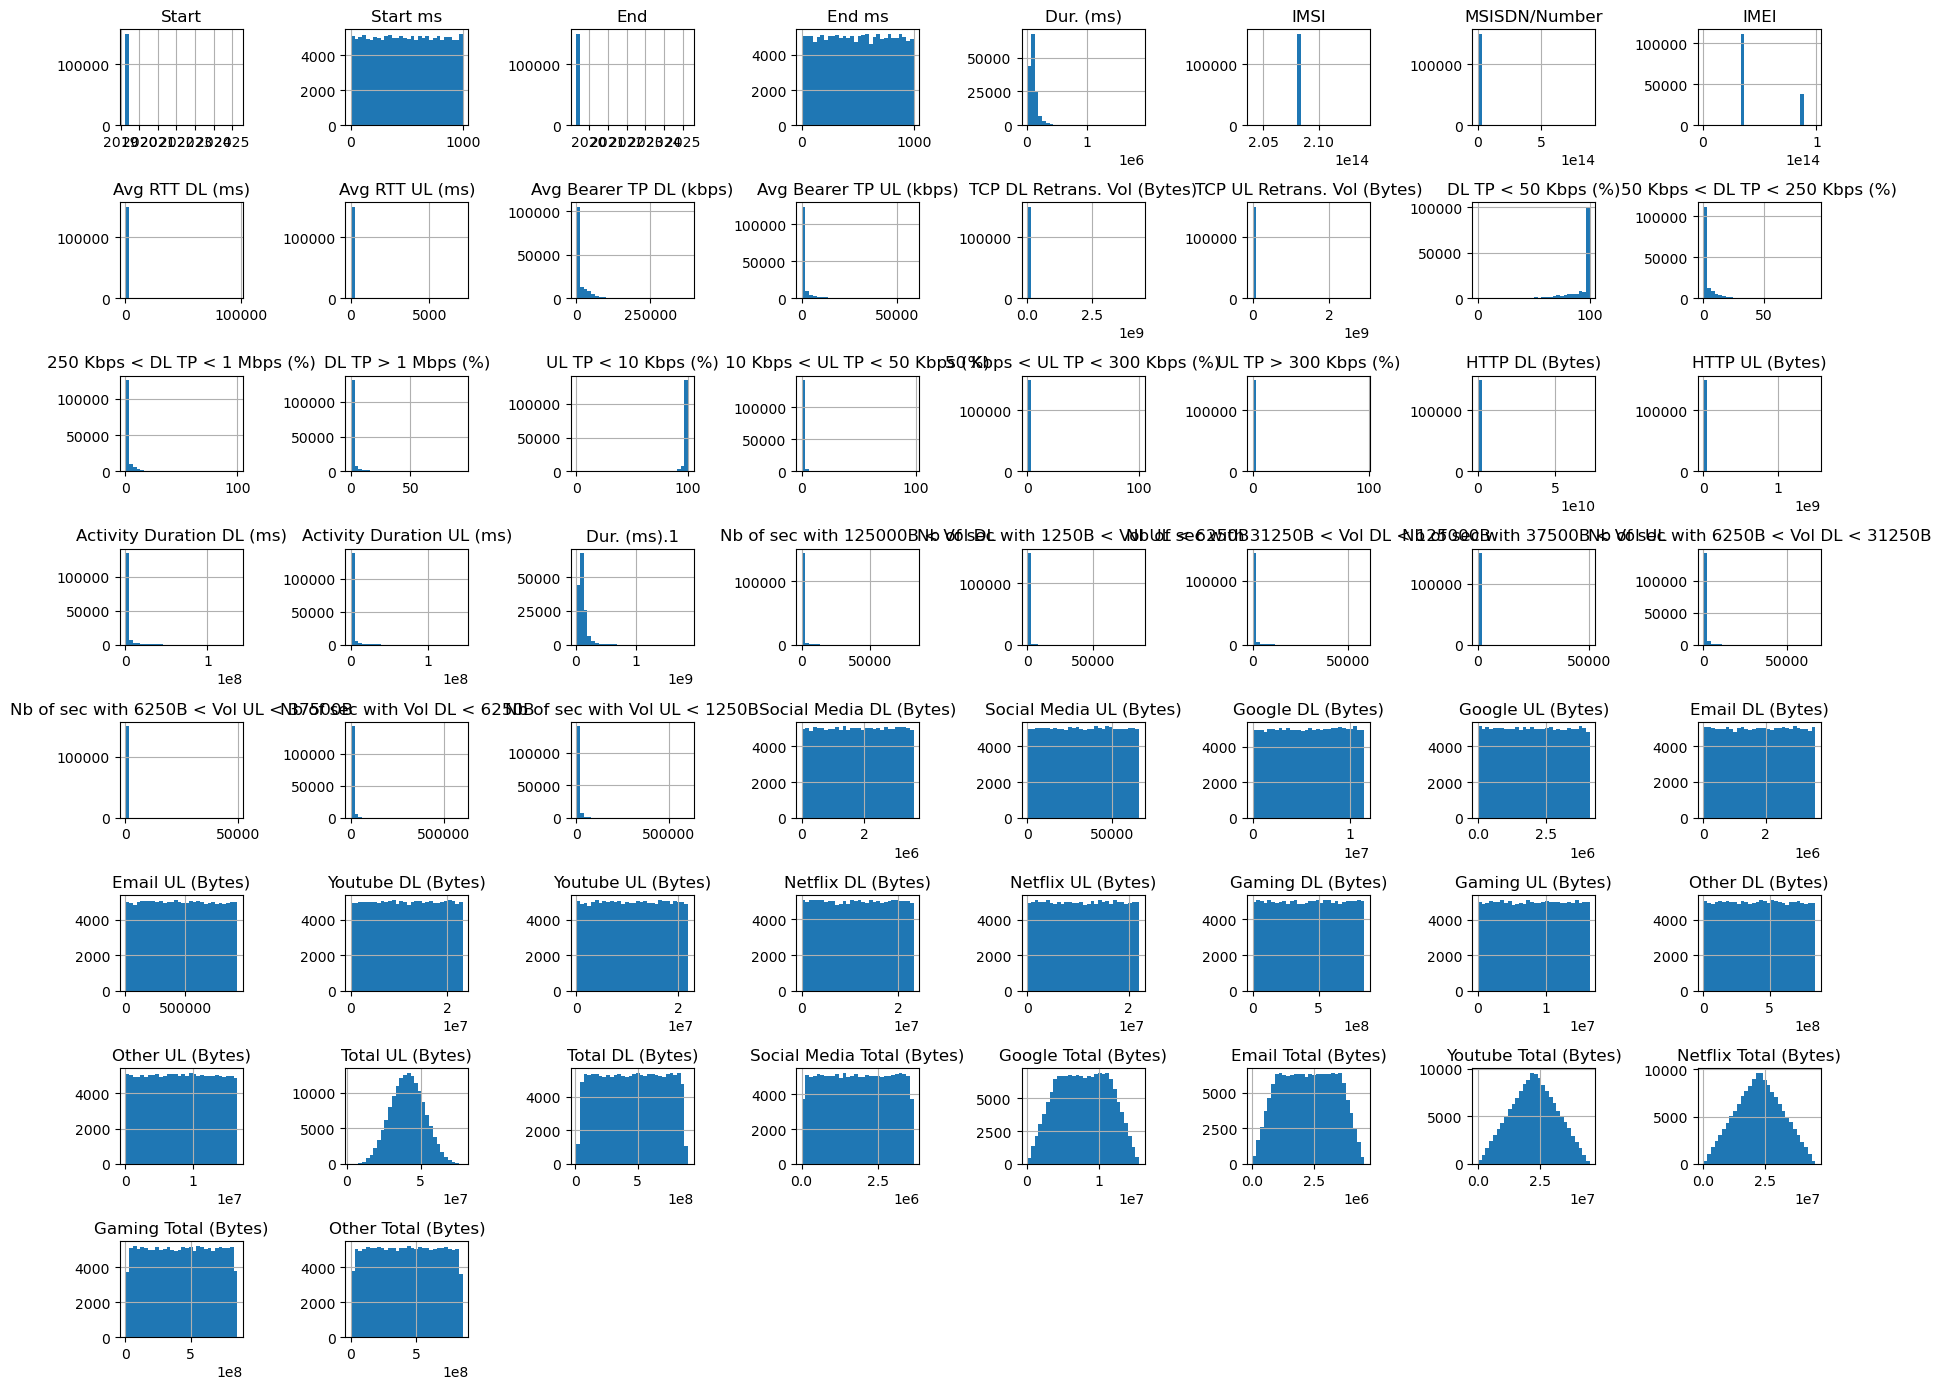

In [167]:
df.hist(bins=30, figsize=(18, 14))
plt.tight_layout()
plt.show()

# ◆ Bivariate Analysis :

**Relationships between applications and total DL+UL data**

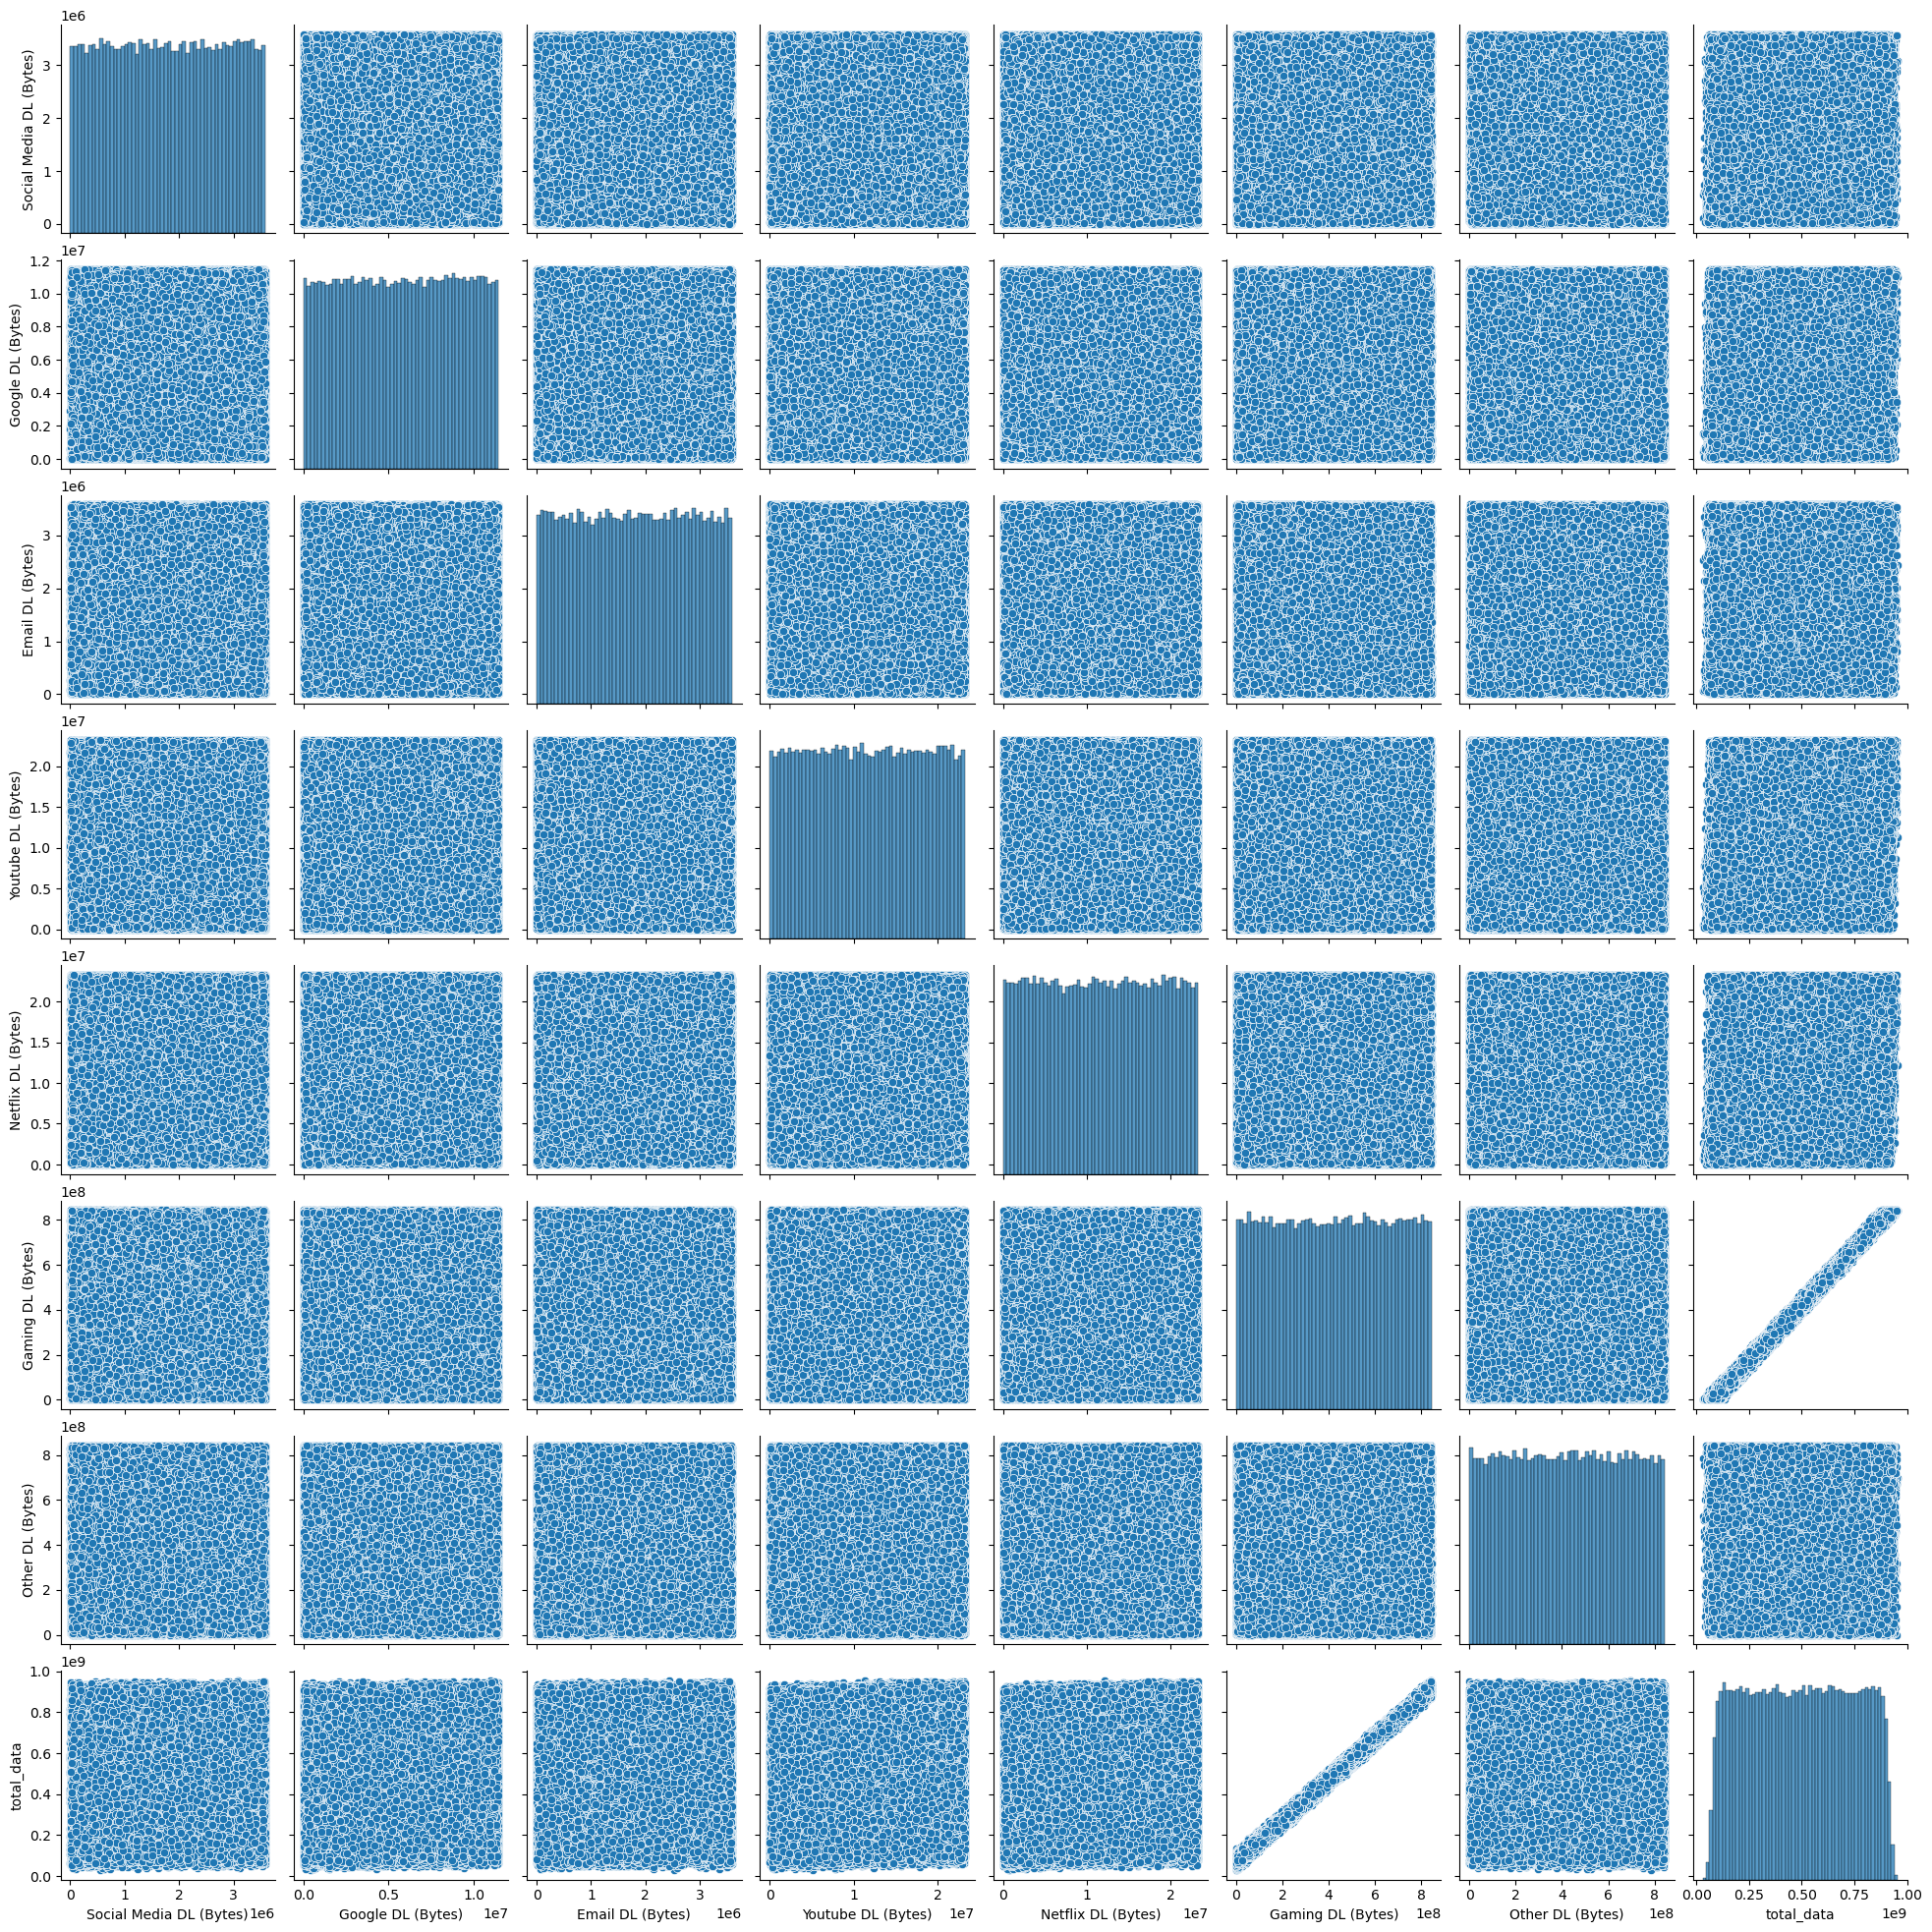

In [170]:
df['total_data'] = df[['Total DL (Bytes)', 'Total UL (Bytes)']].sum(axis=1)

# Pairplot for bivariate analysis
sns.pairplot(df
             [['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 'total_data']])
plt.show()

# Correlation Analysis:

In [172]:
corr_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                  'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                  'Other DL (Bytes)']].corr()

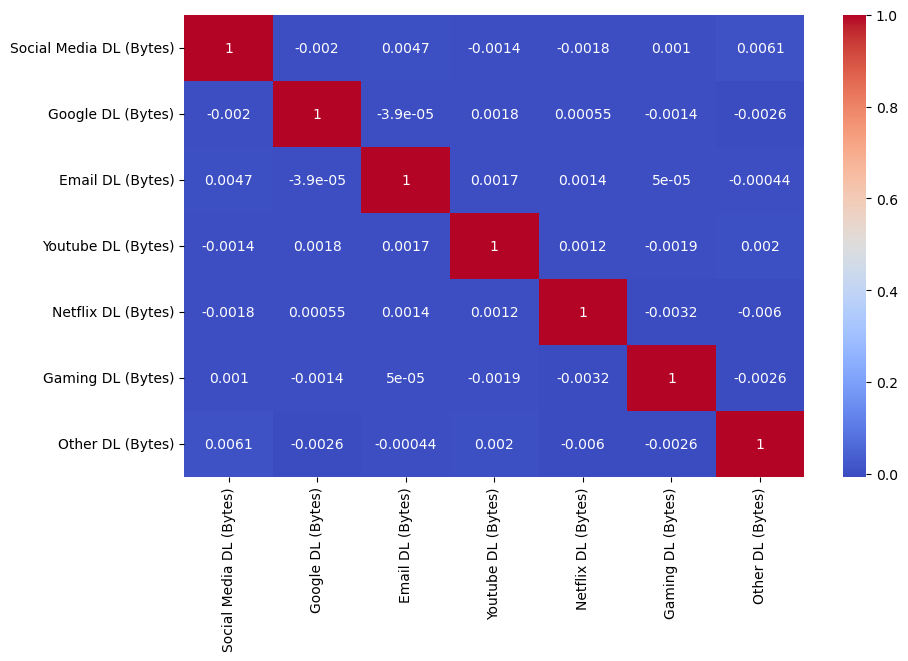

In [173]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Dimensionality Reduction:

# Principal Component Analysis (PCA)

In [176]:
features = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
x = df[features].values
x = StandardScaler().fit_transform(x)

In [177]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca.explained_variance_ratio_)

[0.14439453 0.14355429]


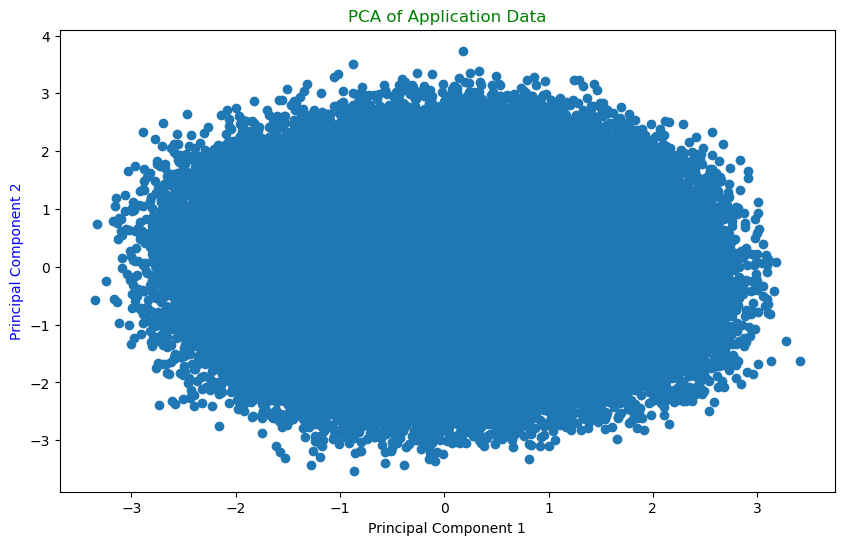

In [178]:
#Visualize:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1', color='black')
plt.ylabel('Principal Component 2',  color='blue')
plt.title('PCA of Application Data',  color='green')
plt.show()

# Task 2 - User Engagement Analysis

# Calculate Session Frequency:

In [181]:
session_frequency_IMSI = df.groupby('IMSI')['Bearer Id'].count().reset_index()
session_frequency_IMSI.columns = ['IMSI', 'Session Frequency']

In [182]:
session_frequency_IMSI.head()

IMSI  Session Frequency
0  2.040471e+14                  1
1  2.040808e+14                  1
2  2.082001e+14                  1
3  2.082001e+14                  1
4  2.082001e+14                  2

# Calculate Duration of the Session:

In [184]:
session_frequency_IMSI = df.groupby('IMSI')['Bearer Id'].count().reset_index()
session_frequency_IMSI.columns = ['IMSI', 'Session Frequency']

In [185]:
session_frequency_IMSI.head()

IMSI  Session Frequency
0  2.040471e+14                  1
1  2.040808e+14                  1
2  2.082001e+14                  1
3  2.082001e+14                  1
4  2.082001e+14                  2

# Calculate Duration of the Session:

In [187]:
session_duration_IMSI = df.groupby('IMSI')['Dur. (ms)'].sum().reset_index()
session_duration_IMSI.columns = ['IMSI', 'Total Session Duration (ms)']

In [188]:
session_duration_IMSI.head()

IMSI  Total Session Duration (ms)
0  2.040471e+14                     869844.0
1  2.040808e+14                     877385.0
2  2.082001e+14                      86019.0
3  2.082001e+14                      86254.0
4  2.082001e+14                     573923.0

# Calculate Session Total Traffic:

In [190]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [191]:
total_traffic_IMSI = df.groupby('IMSI')['Total Traffic (Bytes)'].sum().reset_index()
total_traffic_IMSI.columns = ['IMSI', 'Total Traffic (Bytes)']

In [192]:
total_traffic_IMSI.head()

IMSI  Total Traffic (Bytes)
0  2.040471e+14           1.391536e+08
1  2.040808e+14           2.321240e+08
2  2.082001e+14           8.517164e+07
3  2.082001e+14           4.265016e+08
4  2.082001e+14           1.033092e+09

# Concate  the metrics into a single dataframe:

In [194]:
user_engagement_IMSI = session_frequency_IMSI.merge(session_duration_IMSI, on='IMSI')
user_engagement_IMSI = user_engagement_IMSI.merge(total_traffic_IMSI, on='IMSI')

In [195]:
user_engagement_IMSI.head()

IMSI  Session Frequency  Total Session Duration (ms)  \
0  2.040471e+14                  1                     869844.0   
1  2.040808e+14                  1                     877385.0   
2  2.082001e+14                  1                      86019.0   
3  2.082001e+14                  1                      86254.0   
4  2.082001e+14                  2                     573923.0   

   Total Traffic (Bytes)  
0           1.391536e+08  
1           2.321240e+08  
2           8.517164e+07  
3           4.265016e+08  
4           1.033092e+09

# ◆ Aggregate Metrics Per Customer ID (MSISDN):

# Calculate session frequency per MSISDN:

In [198]:
session_frequency_MSISDN = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
session_frequency_MSISDN.columns = ['MSISDN/Number', 'Session Frequency']

In [199]:
session_frequency_IMSI.head()

IMSI  Session Frequency
0  2.040471e+14                  1
1  2.040808e+14                  1
2  2.082001e+14                  1
3  2.082001e+14                  1
4  2.082001e+14                  2

# Calculate total session duration per MSISDN:

In [201]:
session_duration_MSISDN = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration_MSISDN.columns = ['MSISDN/Number', 'Total Session Duration (ms)']

In [202]:
session_duration_MSISDN.head()

MSISDN/Number  Total Session Duration (ms)
0   3.360100e+10                     116720.0
1   3.360100e+10                     181230.0
2   3.360100e+10                     134969.0
3   3.360101e+10                      49878.0
4   3.360101e+10                      37104.0

# Calculate total traffic per MSISDN:

In [204]:
total_traffic_MSISDN = df.groupby('MSISDN/Number')['Total Traffic (Bytes)'].sum().reset_index()
total_traffic_MSISDN.columns = ['MSISDN/Number', 'Total Traffic (Bytes)']

In [205]:
total_traffic_MSISDN.head()

MSISDN/Number  Total Traffic (Bytes)
0   3.360100e+10           8.786906e+08
1   3.360100e+10           1.568596e+08
2   3.360100e+10           5.959665e+08
3   3.360101e+10           4.223207e+08
4   3.360101e+10           1.457411e+09

# Merge the metrics into a single dataframe

In [207]:
user_engagement_MSISDN = session_frequency_MSISDN.merge(session_duration_MSISDN, on='MSISDN/Number')
user_engagement_MSISDN = user_engagement_MSISDN.merge(total_traffic_MSISDN)

# Report the top 10 customers per engagement metric:

In [209]:
top_10_session_frequency = user_engagement_MSISDN.nlargest(10, 'Session Frequency')

In [210]:
top_10_session_frequency

MSISDN/Number  Session Frequency  Total Session Duration (ms)  \
53644   3.366371e+10               1067                   72655568.0   
13526   3.362632e+10                 18                    8791927.0   
6437    3.361489e+10                 17                    9966898.0   
13180   3.362578e+10                 17                   18553754.0   
37052   3.365973e+10                 16                    4035428.0   
76363   3.367588e+10                 15                    4865947.0   
92923   3.376054e+10                 15                    9279434.0   
65118   3.366716e+10                 13                    8744914.0   
666     3.360313e+10                 12                    6287761.0   
1279    3.360452e+10                 12                    5207990.0   

       Total Traffic (Bytes)  
53644           5.319636e+11  
13526           7.971167e+09  
6437            8.846226e+09  
13180           8.499621e+09  
37052           7.705863e+09  
76363           7.891111e+09  
92923           8.514774e+09  
65118           5.618394e+09  
666             4.976195e+09  
1279            5.487855e+09

# Normalize Metrics and Run K-Means:

In [212]:
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(user_engagement_MSISDN[['Session Frequency', 
                                                           'Total Session Duration (ms)', 
                                                           'Total Traffic (Bytes)']])

# ◆ Run k-means clustering (k=3):

In [214]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_metrics)
user_engagement_MSISDN['Cluster'] = kmeans.labels_

In [215]:
#Compute statistics for each cluster
cluster_stats = user_engagement_MSISDN.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

In [216]:
cluster_stats

Session Frequency                             \
                      min   max         mean     sum   
Cluster                                                
0                       1    18     3.226192   28626   
1                    1067  1067  1067.000000    1067   
2                       1     4     1.227858  120308   

        Total Session Duration (ms)                                          \
                                min         max          mean           sum   
Cluster                                                                       
0                           89973.0  18553754.0  5.047891e+05  4.478994e+09   
1                        72655568.0  72655568.0  7.265557e+07  7.265557e+07   
2                            7142.0    433962.0  1.136915e+05  1.113972e+10   

        Total Traffic (Bytes)                                            
                          min           max          mean           sum  
Cluster                                                                  
0                5.714004e+07  8.846226e+09  1.651840e+09  1.465678e+13  
1                5.319636e+11  5.319636e+11  5.319636e+11  5.319636e+11  
2                3.324901e+07  2.762548e+09  6.039523e+08  5.917645e+13

In [217]:
# Aggregate User Total Traffic Per Application:

In [218]:
application_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)',
                      'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
                      'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                      'Other DL (Bytes)', 'Other UL (Bytes)']

In [219]:
# Calculate total traffic per application
for app in application_columns:
   df[app + ' Total'] =df[app]

In [220]:
# Sum the total traffic per application per user
application_traffic = df.groupby('MSISDN/Number')[['Social Media DL (Bytes) Total', 
                                                   'Social Media UL (Bytes) Total',
                                                   'Google DL (Bytes) Total', 
                                                   'Google UL (Bytes) Total', 
                                                   'Email DL (Bytes) Total',
                                                   'Email UL (Bytes) Total',
                                                   'Youtube DL (Bytes) Total', 
                                                   'Youtube UL (Bytes) Total', 
                                                   'Netflix DL (Bytes) Total', 
                                                   'Netflix UL (Bytes) Total', 
                                                   'Gaming DL (Bytes) Total', 
                                                   'Gaming UL (Bytes) Total', 
                                                   'Other DL (Bytes) Total', 
                                                   'Other UL (Bytes) Total']].sum().reset_index()

In [221]:
# Derive the top 10 most engaged users per application

In [222]:
top_10_per_app = {}
for app in application_columns:
    app_col = app + ' Total'
    top_10_per_app[app] = application_traffic.nlargest(10, app_col)

In [223]:
top_10_per_app

{'Social Media DL (Bytes)':         MSISDN/Number  Social Media DL (Bytes) Total  \
 53644    3.366371e+10                   1.938043e+09   
 13526    3.362632e+10                   4.274384e+07   
 92923    3.376054e+10                   3.929765e+07   
 37052    3.365973e+10                   3.490044e+07   
 6437     3.361489e+10                   2.774974e+07   
 13180    3.362578e+10                   2.656412e+07   
 65118    3.366716e+10                   2.375375e+07   
 106137   3.378632e+10                   2.356866e+07   
 70960    3.366907e+10                   2.347705e+07   
 666      3.360313e+10                   2.277668e+07   
 
         Social Media UL (Bytes) Total  Google DL (Bytes) Total  \
 53644                    3.615635e+07             6.009292e+09   
 13526                    6.309420e+05             1.161065e+08   
 92923                    4.855430e+05             8.862653e+07   
 37052                    5.119140e+05             9.095855e+07   
 6437    

In [224]:
# Plot Top 3 Most Used Applications:

In [225]:
application_totals = application_traffic.sum().reset_index()
application_totals.columns = ['Application', 'Total Traffic (Bytes)']

In [226]:
application_totals

Application  Total Traffic (Bytes)
0                   MSISDN/Number           4.820780e+15
1   Social Media DL (Bytes) Total           2.693001e+11
2   Social Media UL (Bytes) Total           4.939298e+09
3         Google DL (Bytes) Total           8.626186e+11
4         Google UL (Bytes) Total           3.084833e+11
5          Email DL (Bytes) Total           2.687611e+11
6          Email UL (Bytes) Total           7.010648e+10
7        Youtube DL (Bytes) Total           1.745123e+12
8        Youtube UL (Bytes) Total           1.651423e+12
9        Netflix DL (Bytes) Total           1.744039e+12
10       Netflix UL (Bytes) Total           1.650274e+12
11        Gaming DL (Bytes) Total           6.330713e+13
12        Gaming UL (Bytes) Total           1.243268e+12
13         Other DL (Bytes) Total           6.316550e+13
14         Other UL (Bytes) Total           1.239728e+12

# Filter out the MSISDN column:

In [228]:
application_totals = application_totals[application_totals['Application'] != 'MSISDN/Number']

In [229]:
top_3_apps = application_totals.nlargest(3, 'Total Traffic (Bytes)')
top_3_apps

Application  Total Traffic (Bytes)
11   Gaming DL (Bytes) Total           6.330713e+13
13    Other DL (Bytes) Total           6.316550e+13
7   Youtube DL (Bytes) Total           1.745123e+12

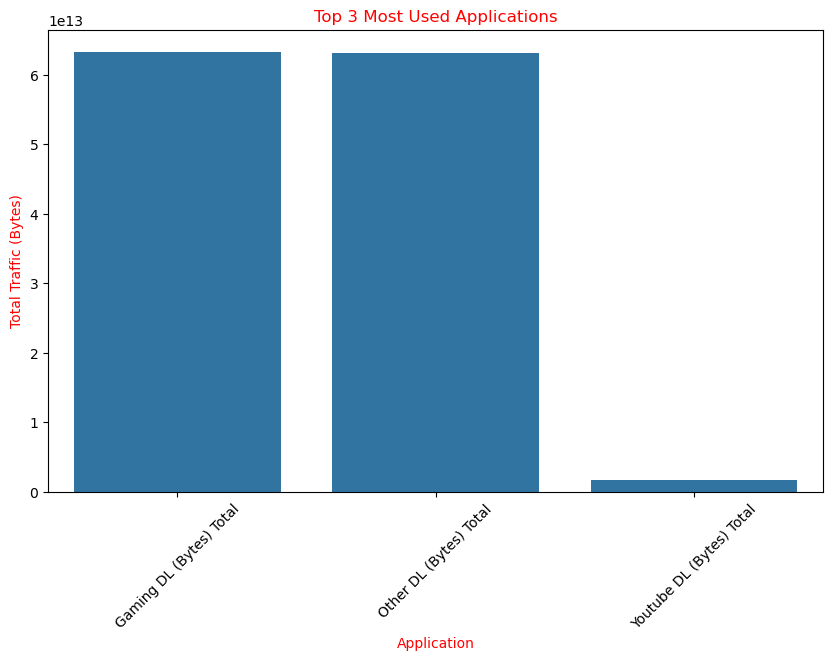

In [230]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Application', y='Total Traffic (Bytes)', data=top_3_apps)
plt.title('Top 3 Most Used Applications', color='red')
plt.xlabel('Application', color='red')
plt.ylabel('Total Traffic (Bytes)', color='red')
plt.xticks(rotation=45)
plt.show()

# Optimize k for K-Means Using the Elbow Method:

In [232]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

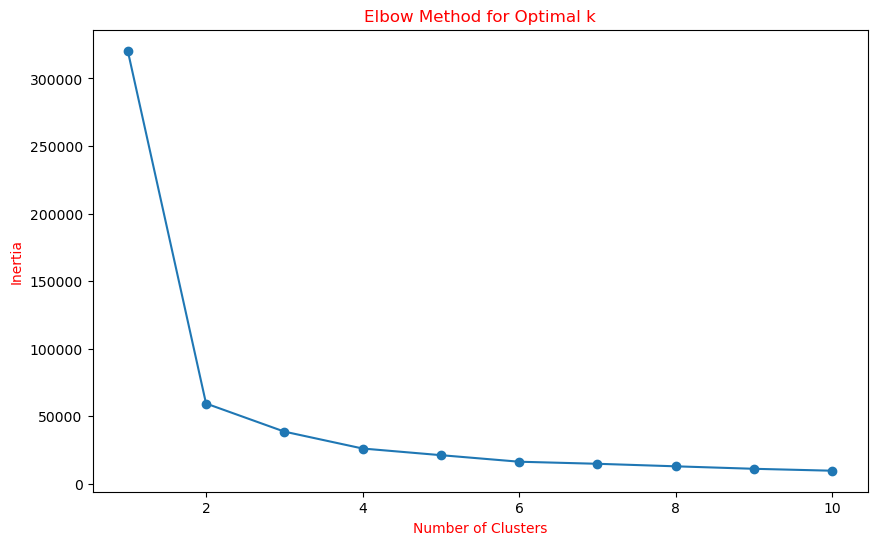

In [233]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', color='red')
plt.xlabel('Number of Clusters', color='red')
plt.ylabel('Inertia', color='red')
plt.show()

# Task 3 - Experience Analytics

# Aggregate per customer (assuming 'IMSI' is the customer identifier):

In [238]:
aggregated_df = df.groupby('IMSI').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': lambda x: x.mode()[0],  # most common handset type per customer
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

# Calculate the average TCP retransmission and RTT:

In [242]:
aggregated_df['Avg TCP Retrans. Vol (Bytes)'] = (aggregated_df['TCP DL Retrans. Vol (Bytes)'] +
                                                 aggregated_df['TCP UL Retrans. Vol (Bytes)']) / 2

aggregated_df['Avg TCP Retrans. Vol (Bytes)']

0         294839.75
1         294839.75
2          11823.25
3          13989.50
4         294839.75
            ...    
107260    294839.75
107261    294839.75
107262     28997.75
107263    294839.75
107264    294839.75
Name: Avg TCP Retrans. Vol (Bytes), Length: 107265, dtype: float64

In [244]:
aggregated_df['Avg RTT (ms)'] = (aggregated_df['Avg RTT DL (ms)'] + 
                                 aggregated_df['Avg RTT UL (ms)']) / 2

aggregated_df['Avg RTT (ms)']

0          25.0
1          25.0
2         151.5
3          42.0
4          46.0
          ...  
107260     25.0
107261     25.0
107262     23.5
107263     25.0
107264     29.0
Name: Avg RTT (ms), Length: 107265, dtype: float64

In [247]:
aggregated_df['Avg Throughput (kbps)'] = (aggregated_df['Avg Bearer TP DL (kbps)'] +
                                          aggregated_df['Avg Bearer TP UL (kbps)']) / 2

aggregated_df['Avg Throughput (kbps)']

0           1.00
1           0.50
2          54.50
3         377.00
4          40.25
           ...  
107260      7.50
107261      7.50
107262    439.00
107263      1.00
107264      3.50
Name: Avg Throughput (kbps), Length: 107265, dtype: float64

# Drop Unnecessary Columns:

In [249]:
aggregated_df.drop(columns=['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                            'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                            'Avg Bearer TP UL (kbps)'], inplace=True)

In [253]:
print(aggregated_df.head())

           IMSI                      Handset Type  \
0  2.040471e+14  Quectel Wireless. Quectel Ec21-E   
1  2.040808e+14  Quectel Wireless. Quectel Ec25-E   
2  2.082001e+14  Dn Electronics Danew Konnect 350   
3  2.082001e+14  Samsung Galaxy Grand (Gt-I9060X)   
4  2.082001e+14           Apple iPhone 6S (A1688)   

   Avg TCP Retrans. Vol (Bytes)  Avg RTT (ms)  Avg Throughput (kbps)  
0                     294839.75          25.0                   1.00  
1                     294839.75          25.0                   0.50  
2                      11823.25         151.5                  54.50  
3                      13989.50          42.0                 377.00  
4                     294839.75          46.0                  40.25  


# Define a function to get top, bottom, and most frequent values:

In [259]:
def get_top_bottom_most_frequent(aggregated_df, col, top_n=10):
    top_values = aggregated_df[col].nlargest(top_n)
    bottom_values = aggregated_df[col].nsmallest(top_n)
    most_frequent_values = aggregated_df[col].value_counts().nlargest(top_n)
    return top_values, bottom_values, most_frequent_values

In [262]:
top_tcp, bottom_tcp, most_freq_tcp = get_top_bottom_most_frequent(aggregated_df, 'Avg TCP Retrans. Vol (Bytes)')

In [264]:
top_tcp, bottom_tcp, most_freq_tcp

(76093    2.150739e+09
 70098    2.144060e+09
 25608    2.134324e+09
 27762    2.127330e+09
 82401    2.105629e+09
 66329    2.083297e+09
 31005    2.068969e+09
 81324    2.058902e+09
 76790    1.984060e+09
 97867    1.893435e+09
 Name: Avg TCP Retrans. Vol (Bytes), dtype: float64,
 29703     48.5
 6407      64.0
 107028    64.5
 56004     67.0
 60466     71.5
 5962      88.0
 12644     88.0
 52330     88.5
 14282     89.5
 102610    91.0
 Name: Avg TCP Retrans. Vol (Bytes), dtype: float64,
 Avg TCP Retrans. Vol (Bytes)
 294839.750    56055
 285012.000      368
 285030.000      168
 11139.750       146
 289925.875       82
 285024.000       81
 11804.750        80
 10520.750        79
 10493.750        70
 285695.000       65
 Name: count, dtype: int64)

In [265]:
top_rtt, bottom_rtt, most_freq_rtt = get_top_bottom_most_frequent(aggregated_df, 'Avg RTT (ms)')

In [266]:
top_rtt, bottom_rtt, most_freq_rtt 

(60036    48462.00
 97639    27424.00
 59324    16167.50
 40882    13639.00
 26711    13150.00
 7172     12857.50
 6342     12694.00
 11680    12369.00
 66138    11505.25
 91831    10490.00
 Name: Avg RTT (ms), dtype: float64,
 4705     0.0
 75243    0.0
 73880    1.0
 36675    2.0
 13477    2.5
 70976    3.0
 90082    4.0
 1368     4.5
 48343    4.5
 12935    5.0
 Name: Avg RTT (ms), dtype: float64,
 Avg RTT (ms)
 25.0    19576
 14.5     2952
 19.5     2414
 19.0     1658
 20.0     1649
 15.0     1576
 14.0     1456
 24.5     1403
 20.5     1268
 15.5     1191
 Name: count, dtype: int64)

In [267]:
top_throughput, bottom_throughput, most_freq_throughput = get_top_bottom_most_frequent(aggregated_df, 'Avg Throughput (kbps)')
top_throughput, bottom_throughput, most_freq_throughput

(99472     141965.50
 78733     132862.00
 82270     132588.25
 30923     127475.00
 100792    119491.00
 97566     117682.50
 81129     115491.00
 44664     114151.50
 82533     113667.00
 50621     113252.50
 Name: Avg Throughput (kbps), dtype: float64,
 759     0.0
 1256    0.0
 2184    0.0
 2437    0.0
 3155    0.0
 4918    0.0
 5943    0.0
 5973    0.0
 7596    0.0
 7948    0.0
 Name: Avg Throughput (kbps), dtype: float64,
 Avg Throughput (kbps)
 7.5     2882
 31.5    2138
 48.5    1094
 45.0    1062
 49.0    1026
 48.0     939
 49.5     918
 44.5     882
 45.5     868
 47.5     856
 Name: count, dtype: int64)

In [268]:
# Distribution of average throughput per handset type:

In [269]:
throughput_per_handset = aggregated_df.groupby('Handset Type')['Avg Throughput (kbps)'].mean().reset_index()
throughput_per_handset

Handset Type  Avg Throughput (kbps)
0                            A-Link Telecom I. Cubot A5           11755.000000
1                     A-Link Telecom I. Cubot Note Plus            3349.500000
2                        A-Link Telecom I. Cubot Note S            4468.500000
3                          A-Link Telecom I. Cubot Nova           28108.500000
4                         A-Link Telecom I. Cubot Power           34734.000000
...                                                 ...                    ...
1392  Zte Zte Blade C2 Smartphone Android By Sfr Sta...              29.000000
1393                          Zyxel Communicat. Lte7460           30978.000000
1394                          Zyxel Communicat. Sbg3600           48675.500000
1395                    Zyxel Communicat. Zyxel Wah7706            1086.500000
1396                                          undefined            4327.433644

[1397 rows x 2 columns]

# Visualize the Distribution:

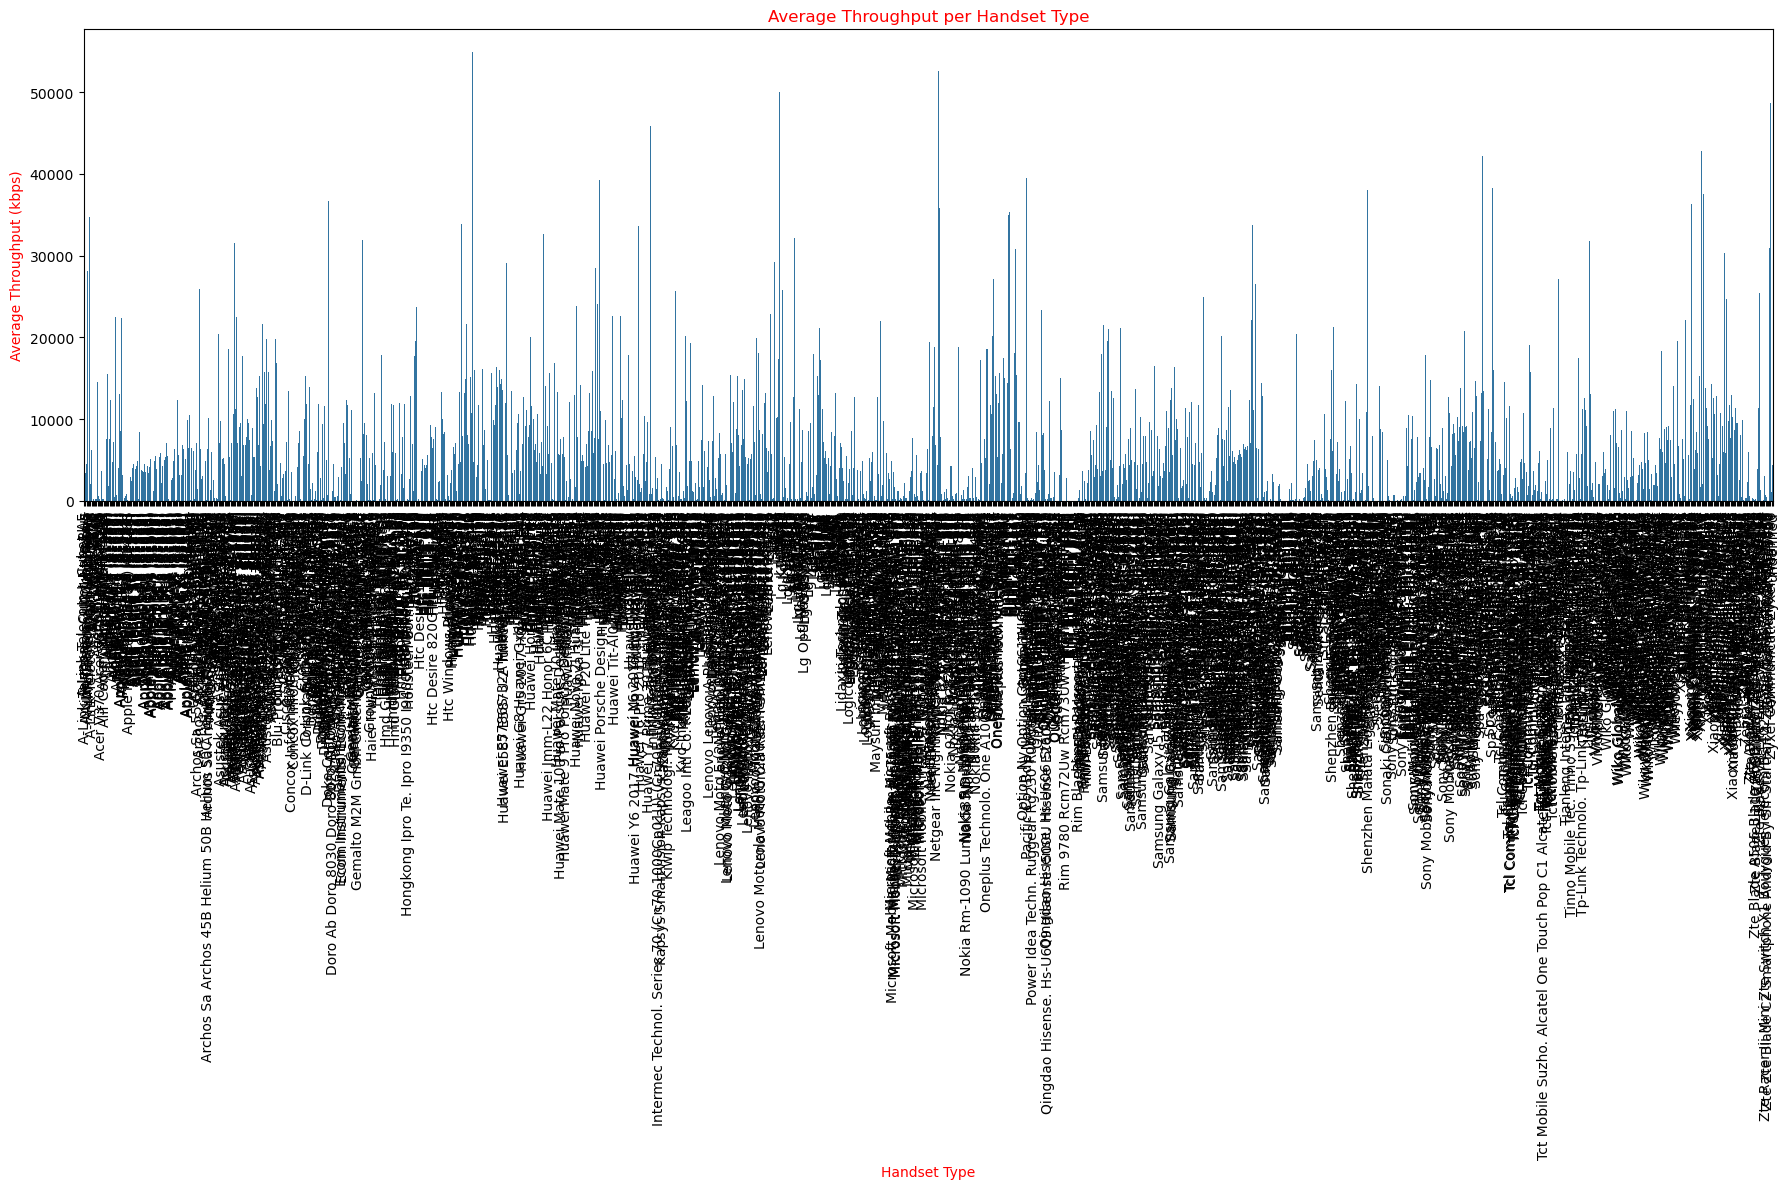

In [271]:
plt.figure(figsize=(18, 12))
sns.barplot(data=throughput_per_handset, x='Handset Type', y='Avg Throughput (kbps)')
plt.xticks(rotation=90)
plt.title('Average Throughput per Handset Type', color='red')
plt.xlabel('Handset Type', color='red')
plt.ylabel('Average Throughput (kbps)', color='red')
plt.tight_layout()
plt.show()

# Average TCP retransmission view per handset type:

In [273]:
tcp_retrans_per_handset = aggregated_df.groupby('Handset Type')['Avg TCP Retrans. Vol (Bytes)'].mean().reset_index()
tcp_retrans_per_handset

Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
1392  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1393                          Zyxel Communicat. Lte7460   
1394                          Zyxel Communicat. Sbg3600   
1395                    Zyxel Communicat. Zyxel Wah7706   
1396                                          undefined   

      Avg TCP Retrans. Vol (Bytes)  
0                     2.948398e+05  
1                     3.081065e+05  
2                     2.070587e+07  
3                     6.858500e+04  
4                     4.020500e+03  
...                            ...  
1392                  1.533222e+05  
1393                  2.063827e+07  
1394                  2.674347e+07  
1395                  1.053275e+04  
1396                  6.761174e+05  

[1397 rows x 2 columns]

# Interpretation of findings:

In [275]:
throughput_per_handset_sorted = throughput_per_handset.sort_values(by='Avg Throughput (kbps)', ascending=False)
throughput_per_handset_sorted

Handset Type  Avg Throughput (kbps)
321                           Huawei B715S-23C                54933.4
706                    New-Bund Technol. Mix 2                52605.5
575                                     Lg G6+                50067.5
1394                 Zyxel Communicat. Sbg3600                48675.5
468                             Huawei Y9 2019                45869.5
...                                        ...                    ...
1006                         Samsung Gt-S6310N                    1.0
172   Concox Informati. Concox Gt06 Gt06N Tr06                    1.0
804           Quectel Wireless. Quectel Ec25-E                    0.5
1254                                   Wct Uno                    0.0
589                                 Lg Lg-T385                    0.0

[1397 rows x 2 columns]

In [276]:
tcp_retrans_per_handset_sorted = tcp_retrans_per_handset.sort_values(by='Avg TCP Retrans. Vol (Bytes)', ascending=False)

In [277]:
tcp_retrans_per_handset_sorted

Handset Type  Avg TCP Retrans. Vol (Bytes)
586                           Lg Lg-H635                  4.525316e+08
324                      Huawei Bln-Al10                  1.645873e+08
142  Asustek Asus Zenfone Selfie Zd551Kl                  1.608292e+08
345                     Huawei E5776S-32                  9.939708e+07
974      Samsung Galaxy Tab S3 (Sm-T825)                  6.341046e+07
..                                   ...                           ...
761                            Oppo A37F                  1.188500e+03
551                   Lenovo Moto X Play                  9.085000e+02
233            Gotron (Hk) Elec. Armor X                  7.500000e+02
917     Samsung Galaxy Note 8 (Sm-N9500)                  2.090000e+02
166             Casper Bilgisaya. Via M1                  1.800000e+02

[1397 rows x 2 columns]

# Select relevant features for clustering:

In [279]:
features = aggregated_df[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]

In [280]:
features

Avg TCP Retrans. Vol (Bytes)  Avg RTT (ms)  Avg Throughput (kbps)
0                          294839.75          25.0                   1.00
1                          294839.75          25.0                   0.50
2                           11823.25         151.5                  54.50
3                           13989.50          42.0                 377.00
4                          294839.75          46.0                  40.25
...                              ...           ...                    ...
107260                     294839.75          25.0                   7.50
107261                     294839.75          25.0                   7.50
107262                      28997.75          23.5                 439.00
107263                     294839.75          25.0                   1.00
107264                     294839.75          29.0                   3.50

[107265 rows x 3 columns]

# Standardize the data:

In [282]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering:

In [284]:
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_df['Cluster'] = kmeans.fit_predict(features_scaled)

In [285]:
cluster_centers = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers)

In [286]:
cluster_summary = pd.DataFrame(cluster_centers, columns=['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)'])
cluster_summary['Cluster'] = range(3)

In [287]:
cluster_summary

Avg TCP Retrans. Vol (Bytes)  Avg RTT (ms)  Avg Throughput (kbps)  Cluster
0                  2.217323e+06     52.396962            6553.878919        0
1                  1.073967e+09     71.431476           35644.455143        1
2                  9.485174e+05   5142.496732            1248.575163        2

# Plot the distribution of each cluster:

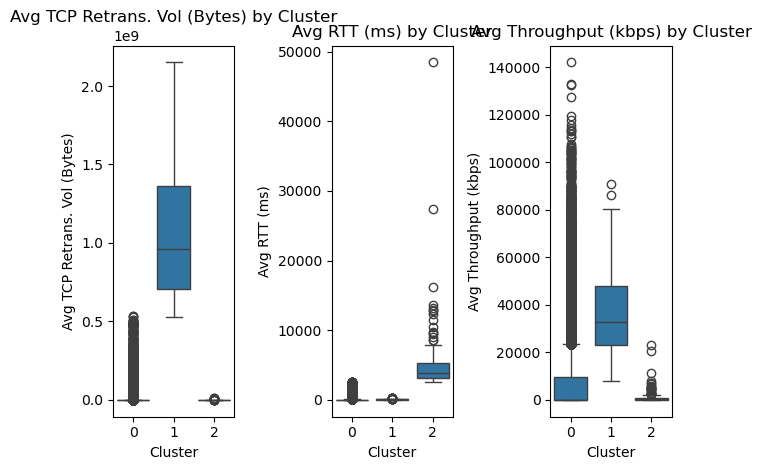

In [289]:
for i, col in enumerate(['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=aggregated_df)
    plt.title(f'{col} by Cluster')

plt.tight_layout()
plt.show()

# Task 4 - Satisfaction Analysis

# Calculate average TCP retransmission, RTT, and throughput:

In [292]:
df['Avg TCP Retrans. Vol (Bytes)'] = (df['TCP DL Retrans. Vol (Bytes)'] +
                                      df['TCP UL Retrans. Vol (Bytes)']) / 2


In [293]:
df['Avg TCP Retrans. Vol (Bytes)']

0         294839.75
1         294839.75
2         294839.75
3         294839.75
4         294839.75
            ...    
149996    294839.75
149997    294839.75
149998    294839.75
149999    294839.75
150000    294839.75
Name: Avg TCP Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [294]:
df['Avg RTT (ms)'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Avg RTT (ms)']

0         23.5
1         35.0
2         25.0
3         25.0
4         25.0
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000    25.0
Name: Avg RTT (ms), Length: 150001, dtype: float64

In [295]:
df['Avg Throughput (kbps)'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

In [296]:
df['Avg Throughput (kbps)']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000    63.0
Name: Avg Throughput (kbps), Length: 150001, dtype: float64

# ◆ Select relevant features for clustering:

In [298]:
features = df[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]

# Standardize the data

In [300]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering for Engagement:

In [303]:
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans_engagement.fit_predict(features_scaled)
df['Engagement Cluster'] = engagement_clusters

# Perform k-means clustering for Experience

In [305]:
kmeans_experience = KMeans(n_clusters=3, random_state=42)
experience_clusters = kmeans_experience.fit_predict(features_scaled)
df['Experience Cluster'] = experience_clusters

# Calculate the Euclidean distance for Engagement score:

In [307]:
less_engaged_centroid = kmeans_engagement.cluster_centers_[0]
df['Engagement Score'] = cdist(features_scaled, [less_engaged_centroid], metric='euclidean')

In [308]:
df['Engagement Score']

0         0.195454
1         0.174413
2         0.193815
3         0.191628
4         0.193815
            ...   
149996    0.211362
149997    0.216120
149998    0.192628
149999    0.200868
150000    0.190495
Name: Engagement Score, Length: 150001, dtype: float64

# Calculate the Euclidean distance for Experience score:

In [310]:
worst_experience_centroid = kmeans_experience.cluster_centers_[2]
df['Experience Score'] = cdist(features_scaled, [worst_experience_centroid], metric='euclidean')

In [311]:
df['Experience Score']

0         2.318006
1         2.317472
2         2.319707
3         2.316994
4         2.319707
            ...   
149996    2.317487
149997    2.319277
149998    2.316996
149999    2.318270
150000    2.315582
Name: Experience Score, Length: 150001, dtype: float64

# Calculate the satisfaction score as the average of Engagement & Experience scores:

In [313]:
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2

In [314]:
df['Satisfaction Score']

0         1.256730
1         1.245942
2         1.256761
3         1.254311
4         1.256761
            ...   
149996    1.264425
149997    1.267698
149998    1.254812
149999    1.259569
150000    1.253039
Name: Satisfaction Score, Length: 150001, dtype: float64

# Report the top 10 satisfied Customers:

In [316]:
top_10_satisfied_customers = df.nsmallest(10, 'Satisfaction Score')

# ◆ Show the top 10 satisfied customers:

In [318]:
print(top_10_satisfied_customers[['Engagement Score', 'Experience Score', 'Satisfaction Score']])

        Engagement Score  Experience Score  Satisfaction Score
3803            0.645366          1.515799            1.080582
117910          0.619941          1.541225            1.080583
137193          1.447365          0.713802            1.080583
77992           0.730120          1.431047            1.080583
76783           0.769380          1.391790            1.080585
24001           0.430901          1.730271            1.080586
1172            0.695187          1.465986            1.080587
2379            0.428509          1.732667            1.080588
77526           0.654626          1.506552            1.080589
112497          0.626012          1.535168            1.080590


# ◆ Preparation of Data:

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# • Prepare the features and target:

In [322]:
X = np.asanyarray(df[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']])
y = np.asanyarray(df['Satisfaction Score'])

In [323]:
X.shape

(150001, 3)

In [324]:
y.shape

(150001,)

In [325]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ◆ Initialize and train the linear_regression_model:

In [327]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [328]:
r2_score = r2_score(y_test, y_pred)

In [329]:
r2_score 

0.9268559732925545

In [330]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [331]:
mae

0.2450745114917932

In [332]:
mse

0.13479988403755602

In [333]:
rmse

0.3671510370917615

In [359]:
import pickle 
pickle.dump(model,open('my_notebook.pkl','wb'))
print(type(model)) 

<class 'sklearn.linear_model._base.LinearRegression'>


# Extract the Engagement and Experience scores:

In [336]:
scores = df[['Engagement Score', 'Experience Score']]

In [337]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Score Cluster'] = kmeans.fit_predict(scores)

In [338]:
centroids = kmeans.cluster_centers_

In [339]:
centroids

array([[ 0.68909856,  1.95593978],
       [23.70481548, 23.53889333]])

# Visualization of the clusters:

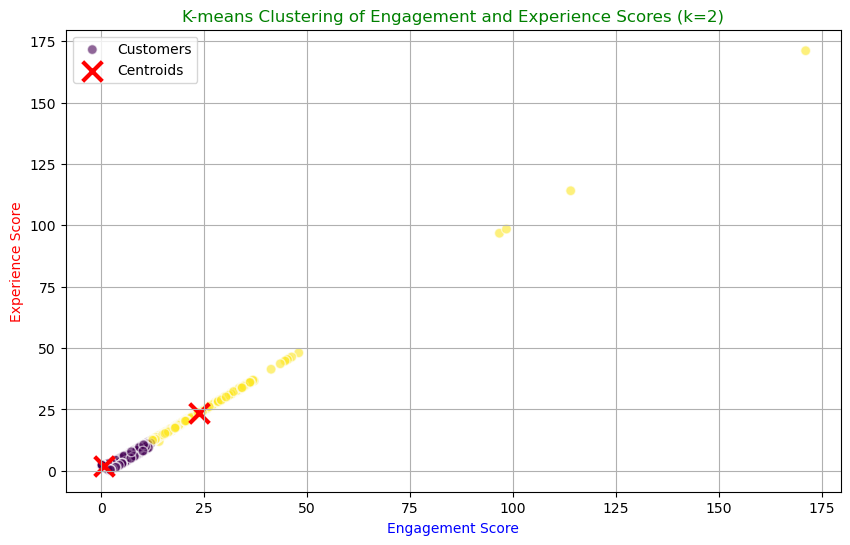

In [341]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Engagement Score'], df['Experience Score'], c=df['Score Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6, edgecolor='w', label='Customers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering of Engagement and Experience Scores (k=2)', color='green')
plt.xlabel('Engagement Score', color='blue')
plt.ylabel('Experience Score', color='red')
plt.legend()
plt.grid(True)
plt.show()

In [342]:
print(pd.DataFrame(centroids, columns=['Engagement Score', 'Experience Score']))

   Engagement Score  Experience Score
0          0.689099          1.955940
1         23.704815         23.538893


# Aggregate the average satisfaction and experience score per cluster:

In [344]:
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2

In [345]:
cluster_aggregation = df.groupby('Score Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

In [346]:
cluster_aggregation

Score Cluster  Satisfaction Score  Experience Score
0              0            1.322519          1.955940
1              1           23.621854         23.538893

In [347]:
Mysql_Data=pd.DataFrame(df,columns=['Bearer Id','Engagement Score', 'Experience Score','Satisfaction Score'])

In [348]:
Mysql_Data.head()

Bearer Id  Engagement Score  Experience Score  \
0  13114483460844900352          0.195454          2.318006   
1  13114483482878900224          0.174413          2.317472   
2  13114483484080500736          0.193815          2.319707   
3  13114483485442799616          0.191628          2.316994   
4  13114483499480700928          0.193815          2.319707   

   Satisfaction Score  
0            1.256730  
1            1.245942  
2            1.256761  
3            1.254311  
4            1.256761

In [349]:
Mysql_Data.isnull().sum()

Bearer Id             0
Engagement Score      0
Experience Score      0
Satisfaction Score    0
dtype: int64

In [350]:
import pickle
import os

with open('telecom_data', 'wb') as file:
    pickle.dump(df, file)

print("File saved successfully!")

File saved successfully!


In [351]:
def convert_ipynb_to_pickle(ipynb_filepath, pickle_filepath):
    """
    Converts a Jupyter Notebook file to a pickle file.

    Args:
        ipynb_filepath (str): The path to the Jupyter Notebook file (.ipynb).
        pickle_filepath (str): The path to save the pickle file (.pkl).
    """
    try:
        with open(ipynb_filepath, 'rb') as ipynb_file:
            notebook_content = ipynb_file.read()
        
        with open(pickle_filepath, 'wb') as pickle_file:
            pickle.dump(notebook_content, pickle_file)
        print(f"Successfully converted '{ipynb_filepath}' to '{pickle_filepath}'")
    
    except FileNotFoundError:
        print(f"Error: File not found at '{ipynb_filepath}'")
    except Exception as e:
         print(f"An error occurred: {e}")
ipynb_file_path = 'PROJECT 5 TELECOM.ipynb'
pickle_file_path = 'my_notebook.pkl'
convert_ipynb_to_pickle(ipynb_file_path, pickle_file_path)

Successfully converted 'PROJECT 5 TELECOM.ipynb' to 'my_notebook.pkl'


# ◆ Connect with Mysql database:

In [353]:
# Rename columns to avoid SQL issues (e.g., spaces, special characters)
df.columns = df.columns.str.replace(' ', '_')

# Display the cleaned dataset
print(df.head())


              Bearer_Id               Start  Start_ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End_ms  Dur._(ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last_Location_Name  ...  Other_UL_(Bytes)_Total  \
0   9164566995485190  ...               8814393.0   
1            L77566A  ...   

In [354]:
from sqlalchemy import create_engine
import pandas as pd

# Example: load your DataFrame here (replace with actual code if needed)
# df = pd.read_csv('your_data.csv')

# Define SQL Server connection details
server = 'DESKTOP-PL6CMAG\\SQLEXPRESS01'
database = 'master'

# Create a connection string with a trusted connection
connection_url = (
    f"mssql+pyodbc://@{server}/{database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)

# Create an engine
engine = create_engine(connection_url)

# Transfer data to SQL Server
table_name = 'telecom_dataset'
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Confirm completion
print(f"Dataset transferred to SQL Server table: {table_name}")

# Dispose the engine
engine.dispose()

OverflowError: int too big to convert